# Telecom Customer Churn Prediction

## Outline of the project

**1.** **Reading and** **Understanding** **Dataset**

1.1   Load the dataset

1.2   Data Exploration

**2.** **Data** **Preprocessing** **and** **Cleansing**

2.1   Finding the Null Values

2.2   Working on the Null Values

2.3   Finding the Outliers

2.4   Transformation of the Data

**3.** **Feature** **Selection**

3.1 Univariate Feature Selection

3.2 Sequential Feature Selection

3.3 Splitting the Data into train and test

**4. Different Classification Models**

4.1 Random Forest Classifier

4.2 Support Vector Machine

4.3 Logistic Regression

**5. Accounting for Imbalance Data**

**6. Hyperparameter using Grid Random Forest
 Tune hyper** **parameters**

**7. Evaluating error on the untest data**

**8. Boosting**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **1.** **Reading and** **Understanding** **Dataset**

**1.1** **Load** **the** **dataset**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                 #importing the necessary python modules

In [2]:
data_folder = r'C:\Users\tejas\OneDrive\Documents\Capstone_project_606\Dataset\Customer Churn Prediction Dataset\telecom_customer_churn.csv'

In [3]:
telecom_data = pd.read_csv(data_folder) #reading the csv file

In [4]:
telecom_data #printing the data

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

## The telecom dataset consists of 7043 rows and 38 columns.

In [5]:
telecom_data.head(5) #displaying the first 5 rows of the dataset

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [6]:
telecom_data.info() #displaying the dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

**1.2** **Data** **Exploration**

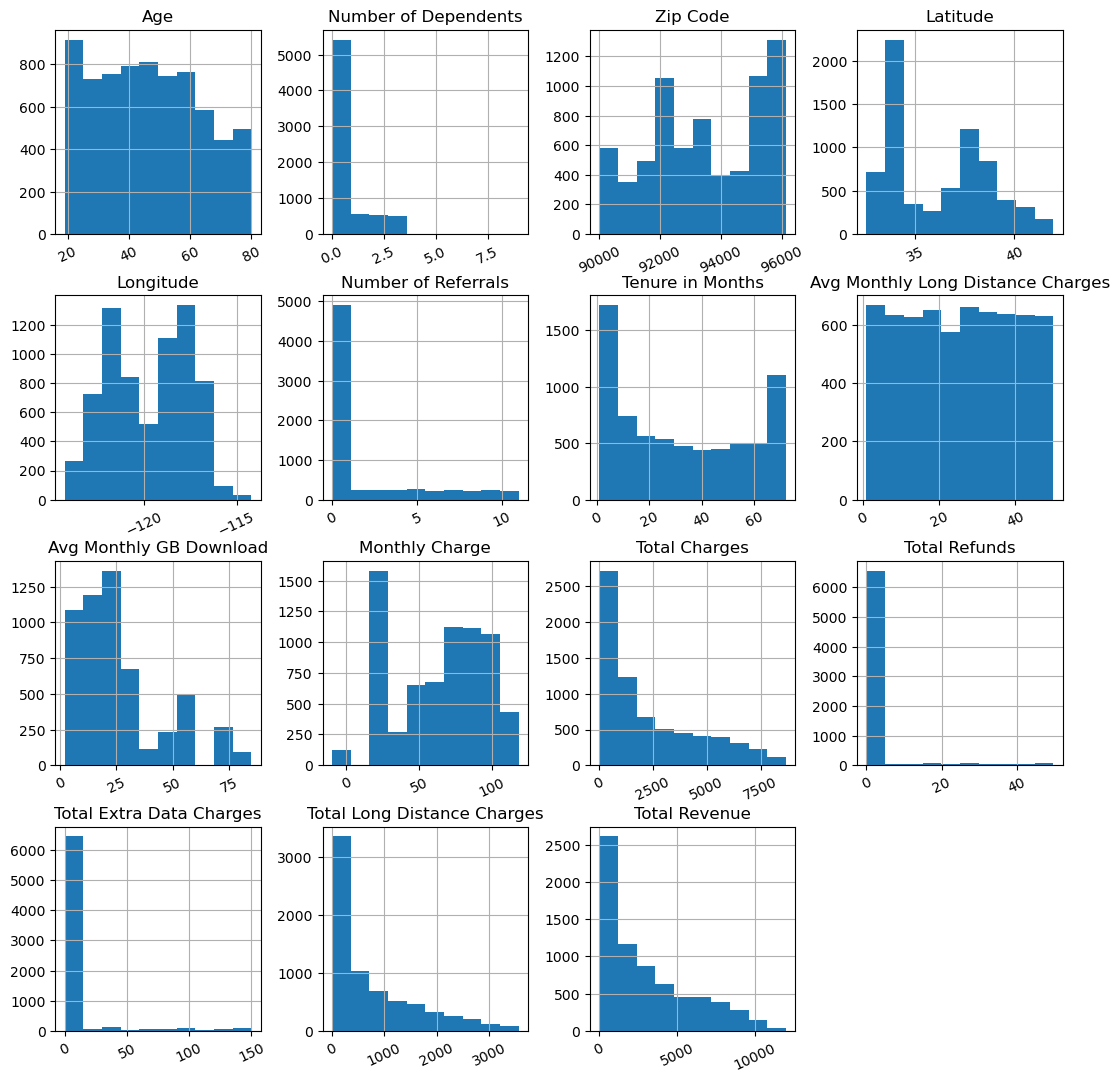

In [7]:
telecom_data.hist(figsize=(13,13), xrot=25); #plotting the histogram

In [8]:
telecom_data.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

For some columns like Total Extra Data Charges, Total refunds, have the data values that are heavily skewed.

From these pivot tables below, we can now see that,

For all the three types of contracts, customers who have churned were paying a higher monthly amount for the telecom companies with the exception of the ones who didn't have a phone service. Here, the major predictor will be contract on a month-to-month basis.

In [9]:
#Using the 'pivot_table' function to calculate the mean of the monthly charges of the different customers

telecom_data.pivot_table(
    index='Contract',
    values='Monthly Charge', 
    columns='Customer Status', 
    aggfunc='mean'
)

Customer Status    Churned     Joined     Stayed
Contract                                        
Month-to-Month   71.784230  42.392279  62.284131
One Year         85.050904  35.622917  62.390404
Two Year         86.777083  57.695455  60.781081

In [10]:
#Checking whether a customer having the multiple lines for the telecom service

telecom_data.pivot_table(
    values='Monthly Charge', 
    index=['Contract', 'Multiple Lines'], 
    columns='Customer Status', 
    aggfunc='mean'
)

Customer Status                  Churned     Joined     Stayed
Contract       Multiple Lines                                 
Month-to-Month No              64.946474  41.740937  54.533750
               Yes             86.868837  59.691250  79.809915
One Year       No              77.111017  34.409091  50.719880
               Yes             95.886022  72.100000  80.950090
Two Year       No              67.695000  54.983333  44.332596
               Yes             95.341429  69.900000  75.144545

In [11]:
#Creating the pivot table for the average tenure in months across the different contract types. 

telecom_data.pivot_table(
    values='Tenure in Months', 
    index='Contract', 
    columns='Customer Status', 
    aggfunc='mean'
)

Customer Status    Churned    Joined     Stayed
Contract                                       
Month-to-Month   14.016918  1.705882  25.042663
One Year         44.963855  1.875000  41.494853
Two Year         61.270833  1.818182  54.353006

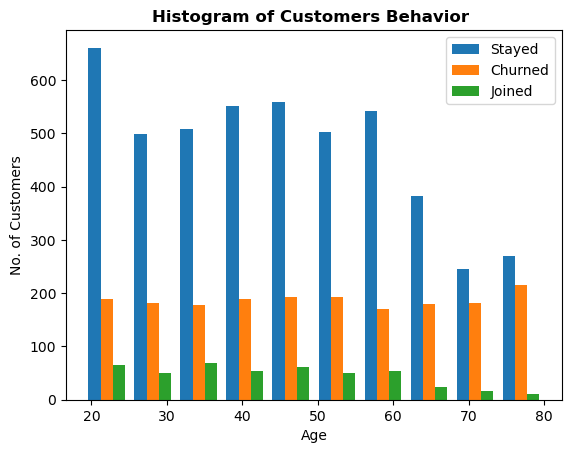

In [12]:
Customer_Stayed=telecom_data[telecom_data['Customer Status']=='Stayed'].Age
Customer_Churned=telecom_data[telecom_data['Customer Status']=='Churned'].Age
Customer_Joined=telecom_data[telecom_data['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('No. of Customers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined],label=['Stayed','Churned','Joined'])

plt.title('Histogram of Customers Behavior ',fontweight ="bold")
plt.legend();

Here, from the above histogram plot, we can see that, we have different range of the ages in all the three categories i.e.; Churned, Joined and Stayed. Now, here we can see there is imbalance in the data, the percentage of the people who stayed is greater than the people who churned. 

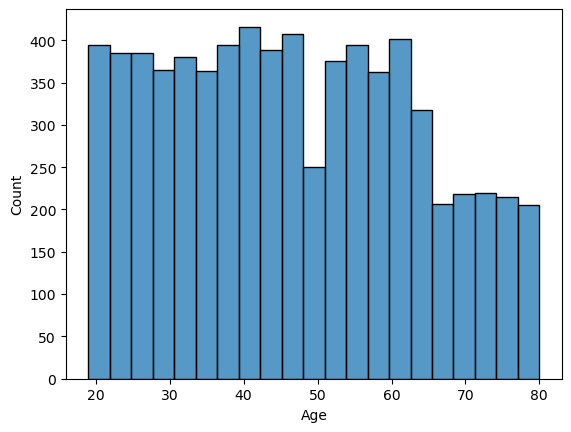

In [13]:
sns.histplot(telecom_data['Age']); #histogram for the age disctribution in the telecom-data

From the above histogram, we can observe that the age is the highly correlated variable. So, for this we have the enough data to take it into validation here.


C:\Users\tejas\AppData\Local\Temp\ipykernel_16804\2440434053.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = telecom_data.corr()


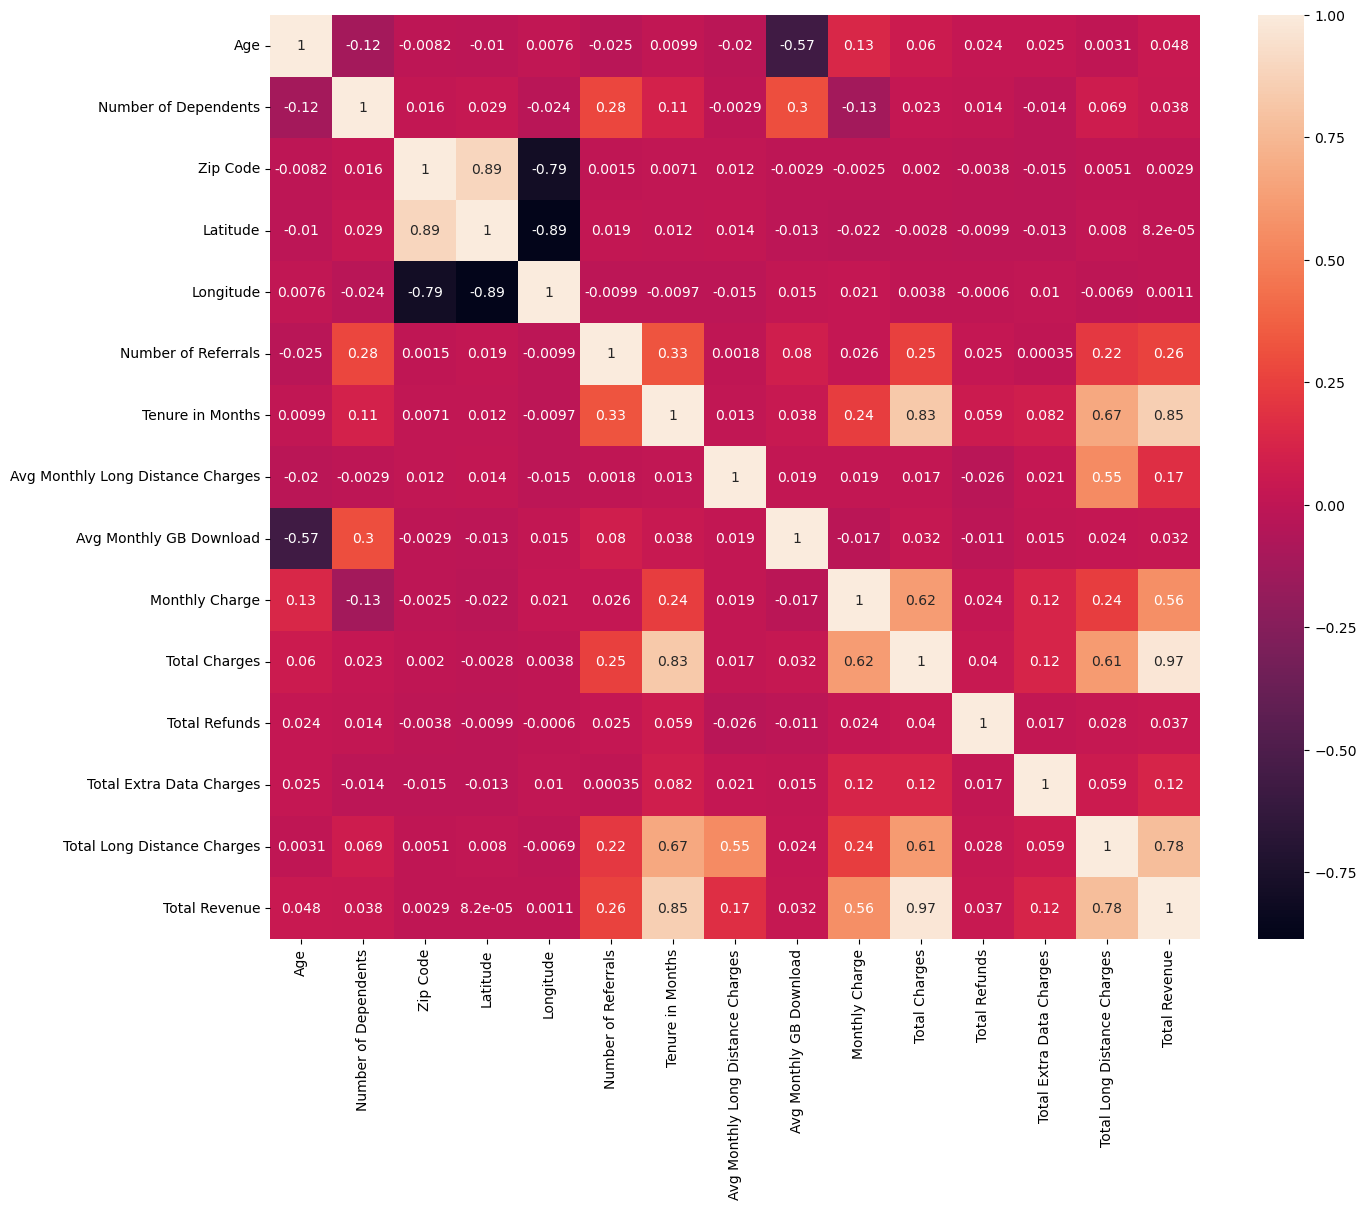

In [14]:
#Checking the correlation for all the data values

data = telecom_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(data, annot = True);


In [15]:
# Based on the correlation maps we can see that Total Long Distance Charges are highly correlated with Total Revenue
# Also ZipCode, latitude and longitude are correlated to each other.

In [16]:
#Using pairplot to do the data analysis for the different variables in the dataset to check for the pairwise relationships.

#sns.pairplot(telecom_data)

In [17]:
#creating the histogram for the distribution of the Customer Status according to the "Stayed", "Joined" and "Churned" categories
import plotly.express as px  
fig = px.histogram(
    telecom_data, 
    x="Customer Status",  
    title = "<b>Distribution of Customer status<b>",
    template ='xgridoff',
    barmode = "group"
)
fig.update_layout(width=400, height=400, bargap=0.2)
fig.show()

From the above figure, we can observe that the people who have stayed is greater than the count of people who have joined or churned.

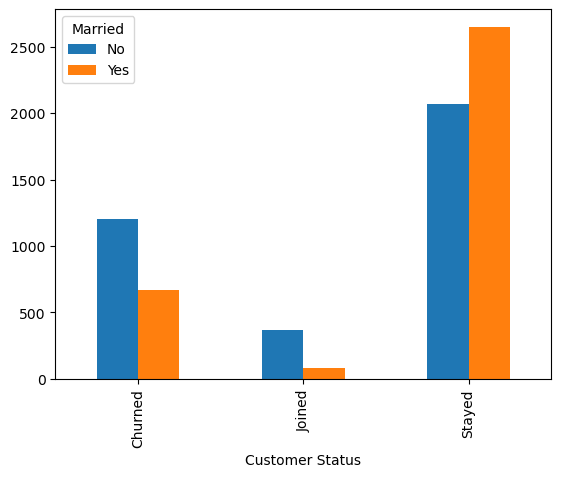

In [18]:
"""
Checking whether the people who got married staying more in the telecom service or
the people who are unmarried staying more in the telecom service

"""
pd.crosstab(telecom_data['Customer Status'], telecom_data['Married']).plot(kind='bar');

Here, we can see that the married people staying more loyal in the company than the person who is unmarried. 

<module 'pandas' from 'C:\\Users\\tejas\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

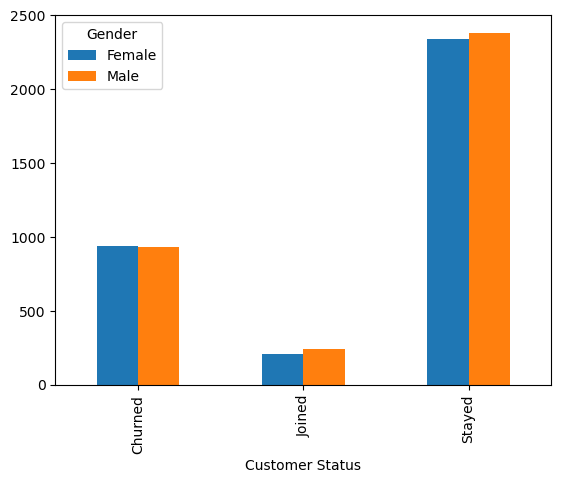

In [19]:
# Showing the distribution of the gender for the different categories of the customer status 
pd.crosstab(telecom_data['Customer Status'], telecom_data['Gender']).plot(kind='bar')
pd

From this, we can find that male and female, both counts are exactly the same for churned, and almost same for the joined and stayed.

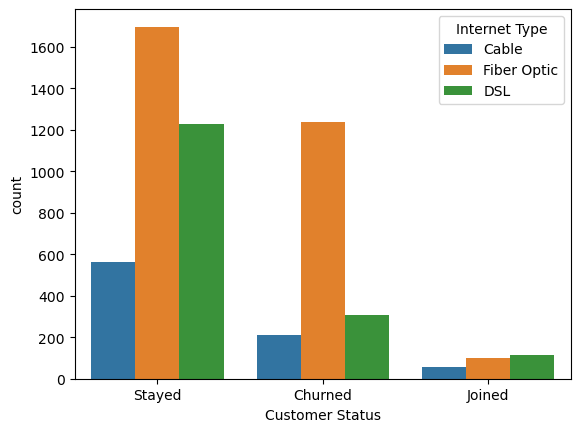

In [20]:
#Trying to find the internet type among the different categories #DSL- digital subscriber line
sns.countplot(data=telecom_data, x='Customer Status', hue='Internet Type');

For all the internet types, here the Fibre Optic contains more count than the other internet networks.

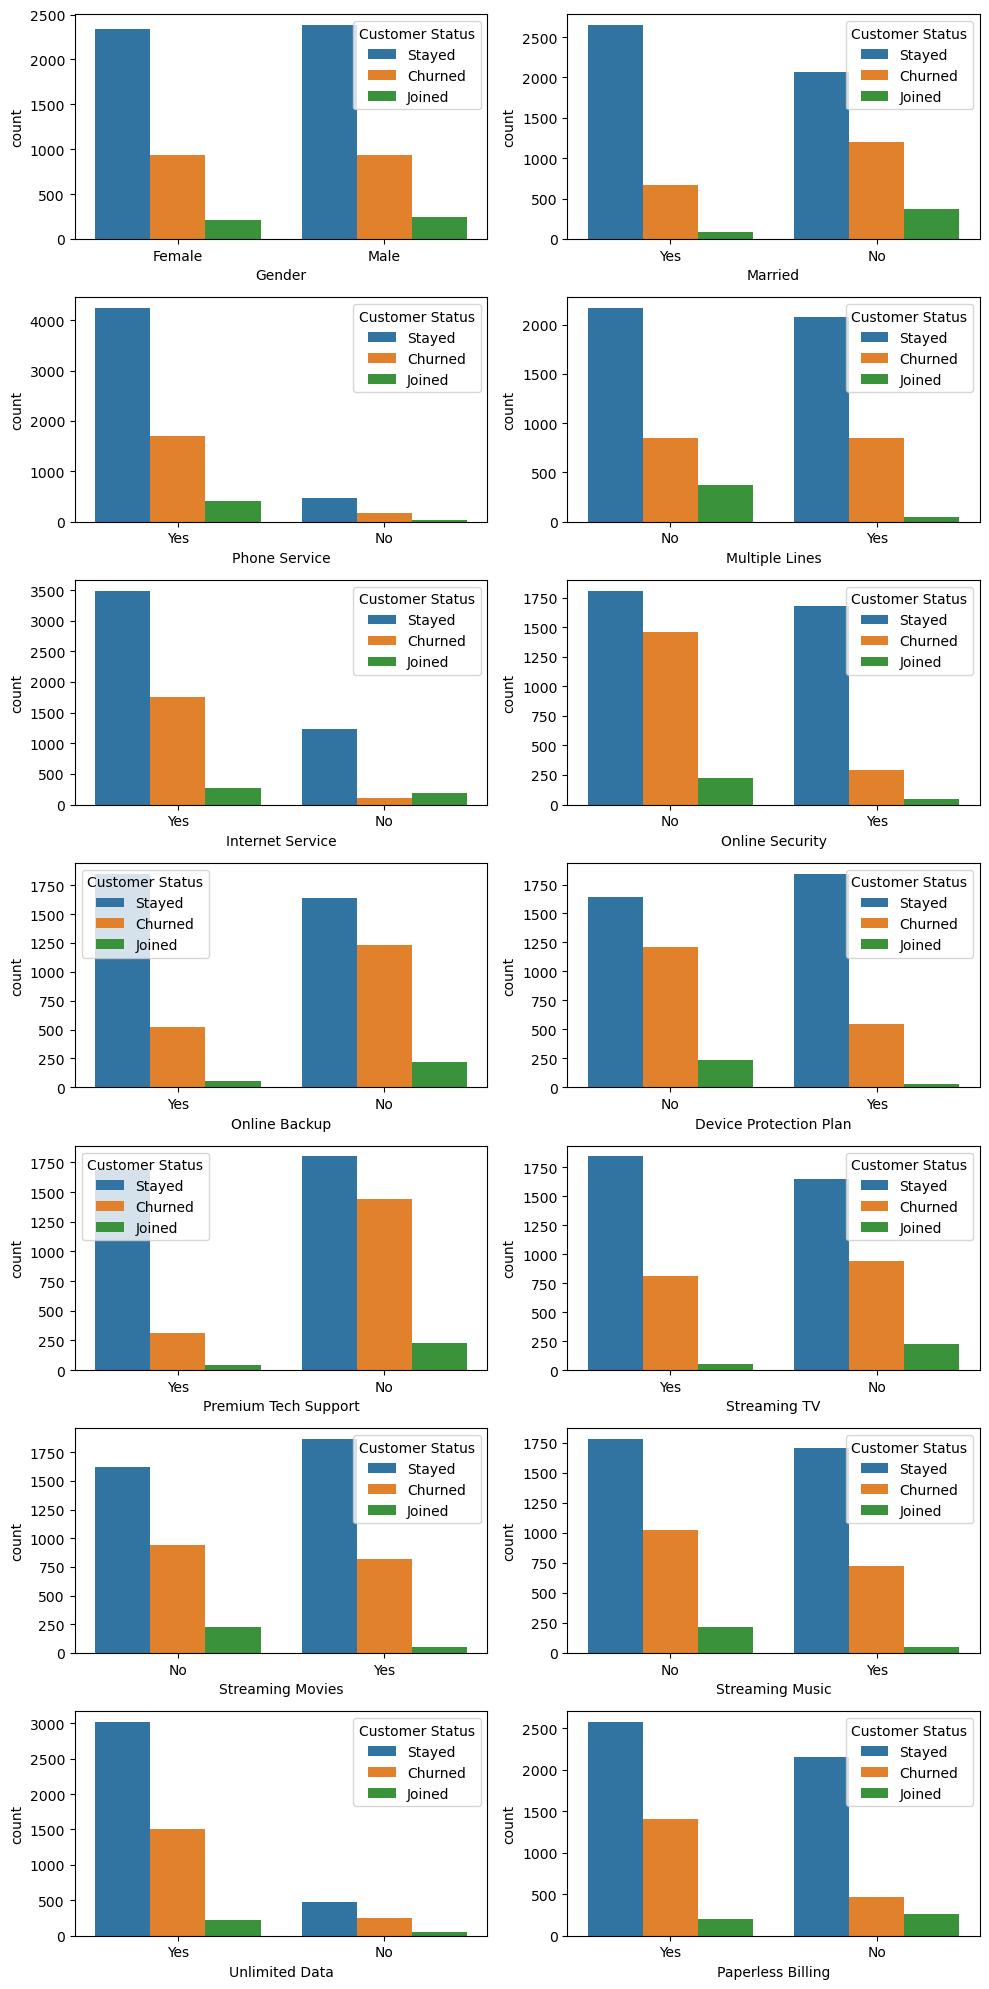

In [21]:
#creating the subplots to visualize the distribution for the different variable categories in "telecom_data" dataframe.
fig,axes=plt.subplots(7,2,figsize=(10,20))
sns.countplot(x="Gender",hue='Customer Status',data=telecom_data,ax=axes[0,0])
sns.countplot(x="Married",hue='Customer Status',data=telecom_data,ax=axes[0,1])
sns.countplot(x="Phone Service",hue='Customer Status',data=telecom_data,ax=axes[1,0])
sns.countplot(x="Multiple Lines",hue='Customer Status',data=telecom_data,ax=axes[1,1])
sns.countplot(x="Internet Service",hue='Customer Status',data=telecom_data,ax=axes[2,0])
sns.countplot(x="Online Security",hue='Customer Status',data=telecom_data,ax=axes[2,1])
sns.countplot(x="Online Backup",hue='Customer Status',data=telecom_data,ax=axes[3,0])
sns.countplot(x="Device Protection Plan",hue='Customer Status',data=telecom_data,ax=axes[3,1])
sns.countplot(x="Premium Tech Support",hue='Customer Status',data=telecom_data,ax=axes[4,0])
sns.countplot(x="Streaming TV",hue='Customer Status',data=telecom_data,ax=axes[4,1])
sns.countplot(x="Streaming Movies",hue='Customer Status',data=telecom_data,ax=axes[5,0])
sns.countplot(x="Streaming Music",hue='Customer Status',data=telecom_data,ax=axes[5,1])
sns.countplot(x="Unlimited Data",hue='Customer Status',data=telecom_data,ax=axes[6,0])
sns.countplot(x="Paperless Billing",hue='Customer Status',data=telecom_data,ax=axes[6,1])
plt.tight_layout() #adjusting the layout to prevent the overlapping
plt.show()

<Axes: xlabel='Customer Status', ylabel='count'>

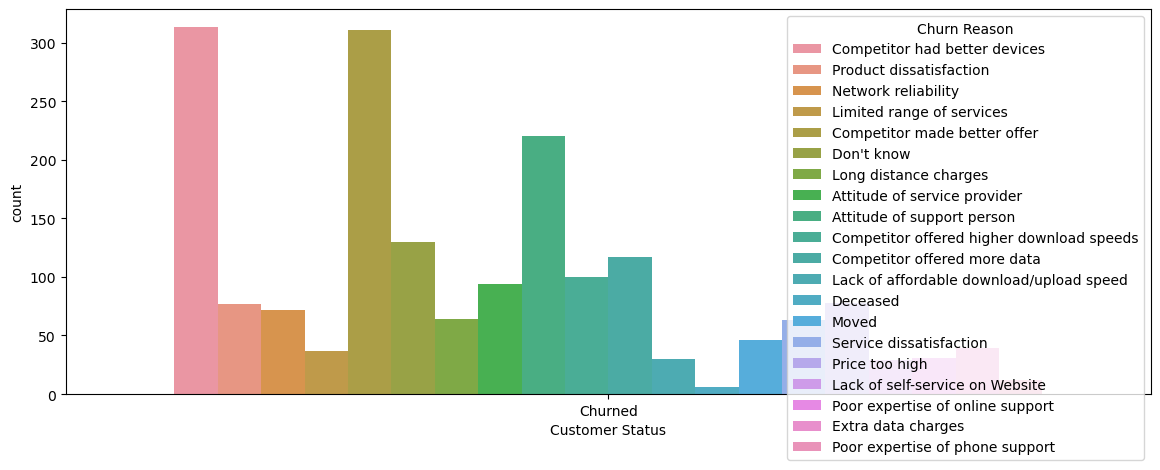

In [22]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=telecom_data[telecom_data['Customer Status']=='Churned'], x='Customer Status', hue='Churn Reason', ax=ax)

I have plotted the graph for the people who are churned and also the churn reason. This has been used as a part of the exploratory data analysis but I have dropped this for the further modelling purposes as this is not giving any insights for the prediction.

# 2. Data Preprocessing and Cleansing

We will get the better view on the dataset for the columns which contains nulls and also the percentage that they contain. We can observe that the Churn reason and Churn category contains full null values.
If we see the columns Avg Monthly GB download, Online Security, Online Backup, Internet Type, Streaming Movies, Streaming Music, Streaming TV, Premium Tech Support, Unlimited Data, these also have sum null values.
There are also few missing values in Avg Monthly Long Distance Charges.
Let's find the null values now.

**2.1** **Finding** **the** **null** **values**

<Axes: >

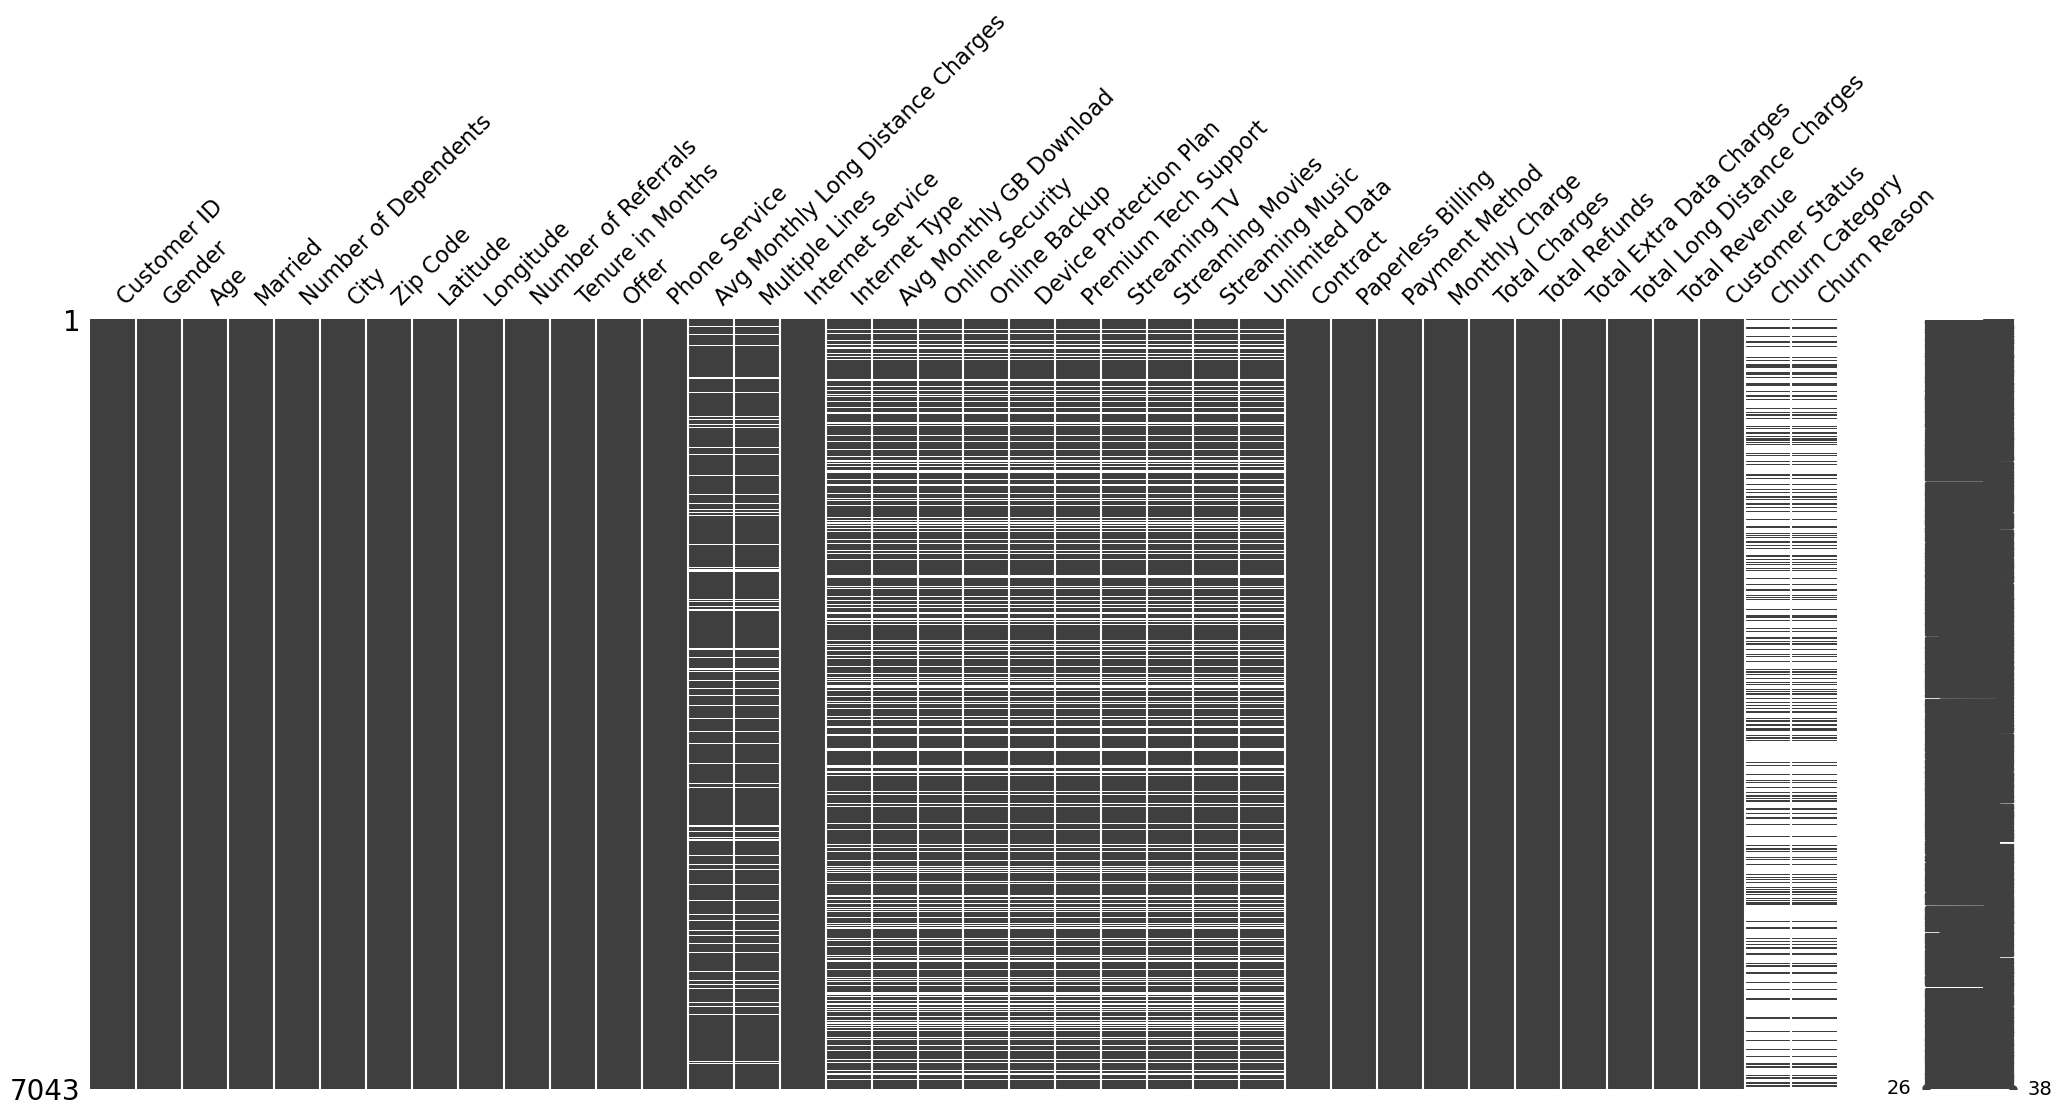

In [23]:
# Library for visualization of missing value
!pip install missingno
import missingno as msno
msno.matrix(telecom_data)

For the cleaning, we are dropping Churn reason and Churn category. Now, we are focus on predicting the Customer status whether they will churn out or not and this will not focus on the reasons.

Here, I am going to drop off the Customer ID column as well as they are just the unique ID of the customers and it is not relevant to the prediction model.

Also, the data values in the "Customer Status" column has 3 unique values, these will tell us about the status of the customer i.e.; Churned, Stayed, Joined. And, I will look for the status if the customer will leave the service or not and I will not consider the new joined customer data.

In [24]:
#Dropping the Customer ID, Churn Category and Churn reason columns
telecom_data = telecom_data.drop('Churn Category',axis=1)
telecom_data = telecom_data.drop('Churn Reason',axis=1)
telecom_data = telecom_data.drop('Customer ID',axis=1)

#Dropping the data values of "Joined" category in the customer status
telecom_data = telecom_data.loc[telecom_data['Customer Status'] != 'Joined']

After performing the above operations on the dataset, below are the columns after the data cleaning process.

In [25]:
telecom_data.columns #35 features

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

**2.2** **Working** **on** **the** **Null** **Values**

Let's start replacing Nulls for the "Internet Type".
First, by counting the numbers of customers that are present in the internet service.

In [26]:
m=telecom_data['Internet Service']  # Checking customers' count present in the internet service.
m.value_counts()

Yes    5245
No     1344
Name: Internet Service, dtype: int64

In [27]:
b=telecom_data['Internet Type']    #Checking count for different internet type.
b.value_counts()            #Digital Subscriber Line

Fiber Optic    2934
DSL            1537
Cable           774
Name: Internet Type, dtype: int64

From the above calculation, we can see that the people who do not OPT for the Internet Service, do not have the option to opt for the "Internet Type" and also for the "Online Security", "Streaming movies" etc.

So, let us replace the blank values as "No Internet", for better understanding on the data.

In [28]:
telecom_data['Internet Type'] = telecom_data['Internet Type'].fillna('No Internet')
telecom_data['Avg Monthly GB Download'] = telecom_data['Avg Monthly GB Download'].fillna(0)
telecom_data['Online Security'] = telecom_data['Online Security'].fillna('No Internet')
telecom_data['Online Backup'] = telecom_data['Online Backup'].fillna('No Internet')
telecom_data['Device Protection Plan'] = telecom_data['Device Protection Plan'].fillna('No Internet')
telecom_data['Premium Tech Support'] = telecom_data['Premium Tech Support'].fillna('No Internet')
telecom_data['Streaming TV'] = telecom_data['Streaming TV'].fillna('No Internet')
telecom_data['Streaming Movies'] = telecom_data['Streaming Movies'].fillna('No Internet')
telecom_data['Streaming Music'] = telecom_data['Streaming Music'].fillna('No Internet')
telecom_data['Unlimited Data'] = telecom_data['Unlimited Data'].fillna('No Internet')

In [29]:
#telecom_data

In [30]:
telecom_data.isna().sum() #finding the count of the missing values in the columns

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    644
Multiple Lines                       644
Internet Service                       0
Internet Type                          0
Avg Monthly GB Download                0
Online Security                        0
Online Backup                          0
Device Protection Plan                 0
Premium Tech Support                   0
Streaming TV                           0
Streaming Movies                       0
Streaming Music                        0
Unlimited Data  

In [31]:
# We have missing values in Avg Monthly Long Distance Charges, Multiple Lines columns after we replaced the nulls.

#Now, we will start by replacing the null values for the "Phone Services"

#Following the above same strategy, I checked with the customers who had opted for the "Phone Service" option. The customers who did not opt for the Phone service will not have an option to the services of 'Avg Monthly Long Distance Charges' and 'Multiple Lines'. Hence, we are going to replace the null values with 'No Phone Service" to have a better interpretation of data in the below analysis.

In [32]:
telecom_data['Phone Service'].value_counts()

Yes    5945
No      644
Name: Phone Service, dtype: int64

In [33]:
telecom_data['Multiple Lines'] = telecom_data['Multiple Lines'].fillna('No Phone Service')
telecom_data['Avg Monthly Long Distance Charges'] = telecom_data['Avg Monthly Long Distance Charges'].fillna(0)

In [34]:
#Let's visualize the data after the analysis

<Axes: >

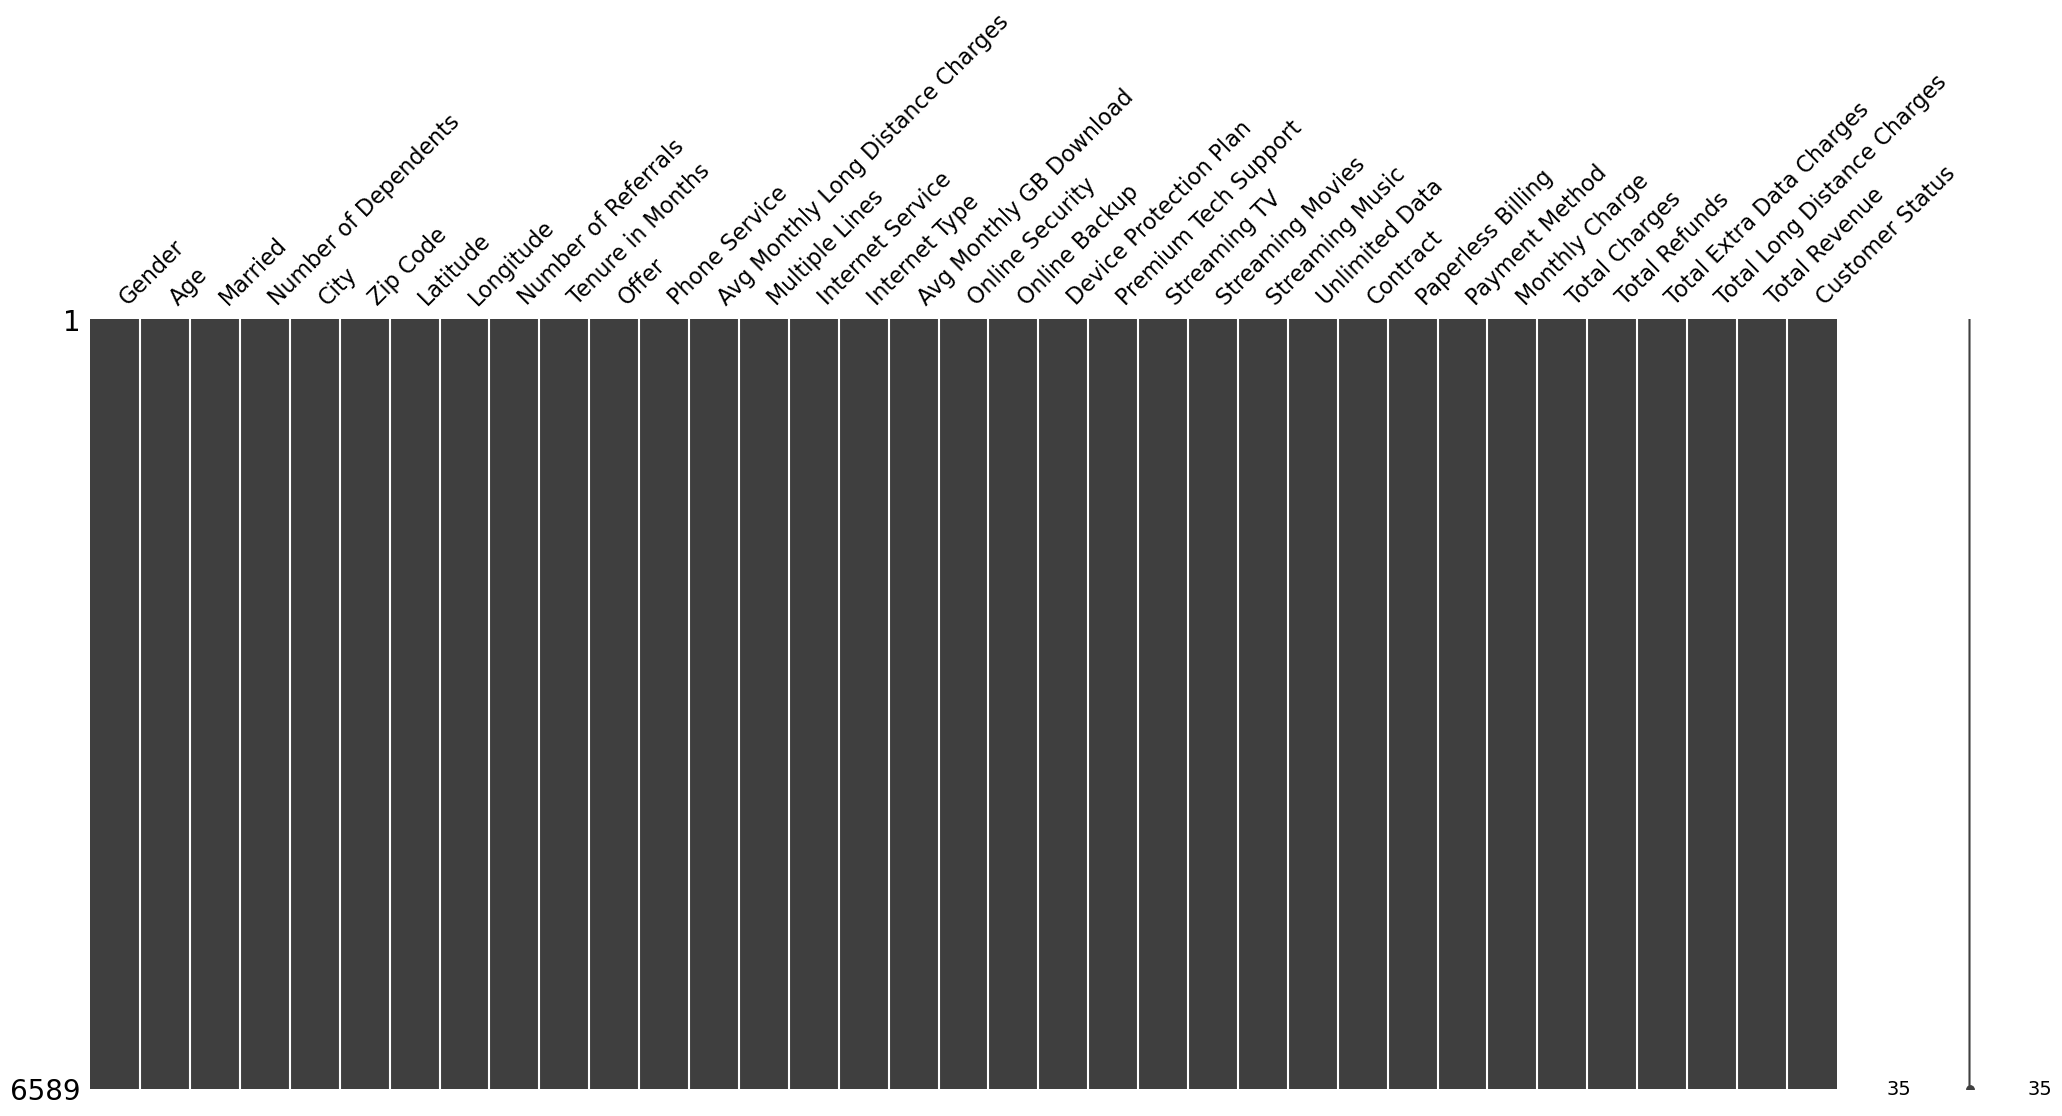

In [35]:
import missingno as msno         # Library for visualization of missing value
msno.matrix(telecom_data)

#After checking and working on all the null data, the visualization of the above data looks pretty good and can go ahead for the next steps.

In [36]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number of Dependents               6589 non-null   int64  
 4   City                               6589 non-null   object 
 5   Zip Code                           6589 non-null   int64  
 6   Latitude                           6589 non-null   float64
 7   Longitude                          6589 non-null   float64
 8   Number of Referrals                6589 non-null   int64  
 9   Tenure in Months                   6589 non-null   int64  
 10  Offer                              6589 non-null   object 
 11  Phone Service                      6589 non-null   objec

**Number** **of** **the** **unique** **customers** **in** **the** **dataset** **:** **7043**

**2.3** **Finding** **the** **Outliers**

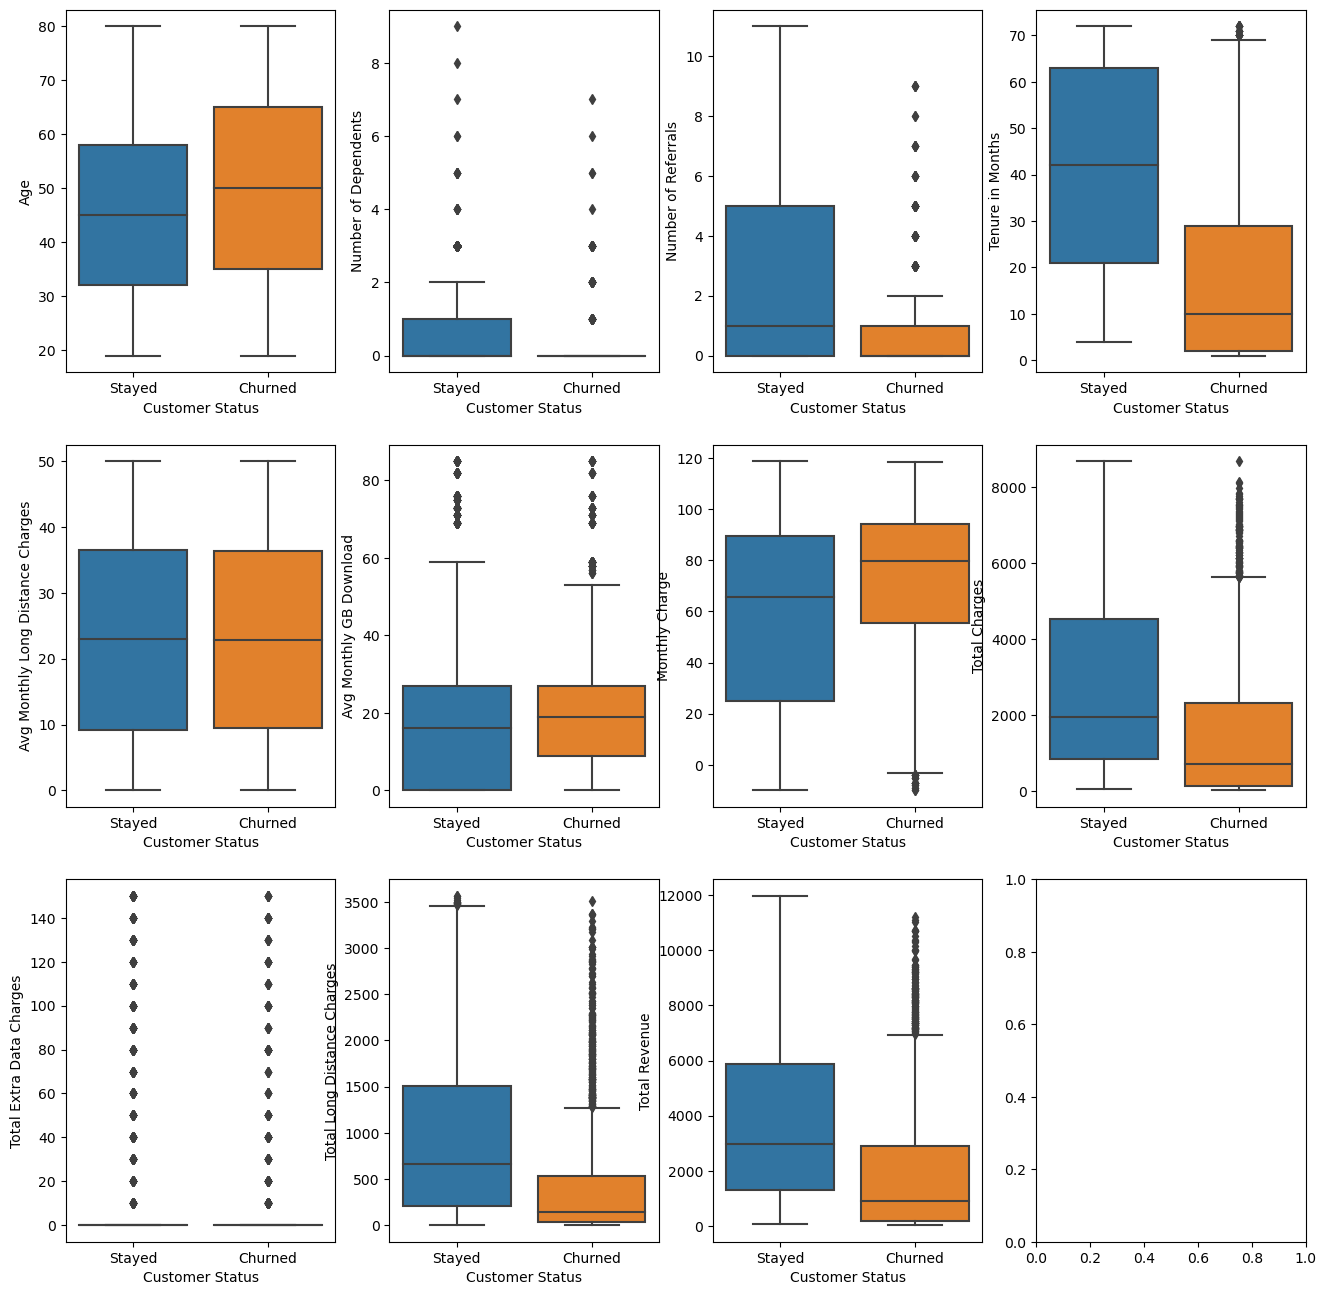

In [37]:
""""Using boxplots for detection of the Outliers to visualize the numerical values distribution
    in the telecom_data DataFrame across different categories of the 'Customer Status' column"""


column_names=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
                'Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

figure, ax = plt.subplots(3,4, figsize = (16,16))
for i, subplot in zip(column_names, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = telecom_data, ax = subplot)
    

In [38]:
# It is observed that even from the above subplots, 
# we can see that the variables (Number of Referrals, Number of Dependents and Total Extra Data Charges) are pretty skewed.

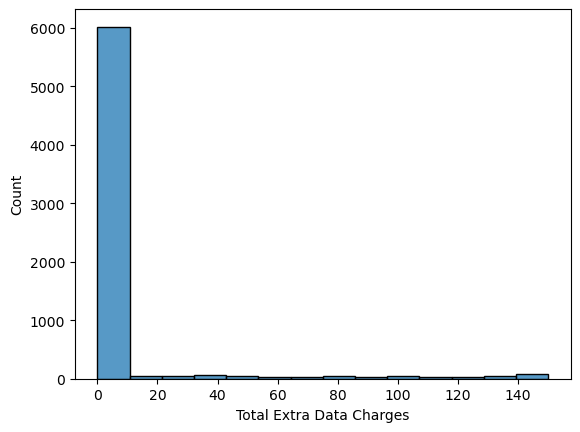

In [39]:
#histogram to view the skewness of the variables
sns.histplot(telecom_data['Total Extra Data Charges']);

In [40]:
S=telecom_data['Total Extra Data Charges'].value_counts()
S.head()

0     5905
10     113
40      61
30      52
20      48
Name: Total Extra Data Charges, dtype: int64

In [41]:
S=telecom_data['Number of Referrals'].value_counts()
S.head()

0    3448
1    1071
5     255
3     247
7     243
Name: Number of Referrals, dtype: int64

***********Here, the Total Extra Data Charges variables are been highly skewed and also the count from 0-10 seems very high when compared with other ranges. The count value from 0-10 is nearly equal to 6000 which is covering 85% of the data.

**2.4** **Transformation** **of** **the** **Data**

In [42]:
# Converting the variables as Categorical for the model prediction for the machine learning model.

telecom_data['Gender'] = pd.Categorical(telecom_data.Gender)
telecom_data['City'] = pd.Categorical(telecom_data.City)
telecom_data['Zip Code'] = pd.Categorical(telecom_data['Zip Code'])
telecom_data['Married'] = pd.Categorical(telecom_data.Married)
telecom_data['Phone Service'] = pd.Categorical(telecom_data['Phone Service'])
telecom_data['Multiple Lines'] = pd.Categorical(telecom_data['Multiple Lines'])
telecom_data['Internet Service'] = pd.Categorical(telecom_data['Internet Service'])
telecom_data['Internet Type'] = pd.Categorical(telecom_data['Internet Type'])
telecom_data['Online Security'] = pd.Categorical(telecom_data['Online Security'])
telecom_data['Online Backup'] = pd.Categorical(telecom_data['Online Backup'])
telecom_data['Device Protection Plan'] = pd.Categorical(telecom_data['Device Protection Plan'])
telecom_data['Premium Tech Support'] = pd.Categorical(telecom_data['Premium Tech Support'])
telecom_data['Streaming TV'] = pd.Categorical(telecom_data['Streaming TV'])
telecom_data['Streaming Movies'] = pd.Categorical(telecom_data['Streaming Movies'])
telecom_data['Streaming Music'] = pd.Categorical(telecom_data['Streaming Music'])
telecom_data['Unlimited Data'] = pd.Categorical(telecom_data['Unlimited Data'])
telecom_data['Contract'] = pd.Categorical(telecom_data['Contract'])
telecom_data['Paperless Billing'] = pd.Categorical(telecom_data['Paperless Billing'])
telecom_data['Payment Method'] = pd.Categorical(telecom_data['Payment Method'])
telecom_data['Payment Method'] = pd.Categorical(telecom_data['Payment Method'])
telecom_data['Customer Status'] = pd.Categorical(telecom_data['Customer Status'])

In [43]:
telecom_data.dtypes

Gender                               category
Age                                     int64
Married                              category
Number of Dependents                    int64
City                                 category
Zip Code                             category
Latitude                              float64
Longitude                             float64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Phone Service                        category
Avg Monthly Long Distance Charges     float64
Multiple Lines                       category
Internet Service                     category
Internet Type                        category
Avg Monthly GB Download               float64
Online Security                      category
Online Backup                        category
Device Protection Plan               category
Premium Tech Support                 category
Streaming TV                      

# 3. Feature Selection

In [44]:
#creating the copy of the "telecom_data" dataframe and assigning it to "data_frame"
data_frame = telecom_data.copy()

In [45]:
data_frame

Gender  Age Married  Number of Dependents          City Zip Code  \
0     Female   37     Yes                     0  Frazier Park    93225   
1       Male   46      No                     0      Glendale    91206   
2       Male   50      No                     0    Costa Mesa    92627   
3       Male   78     Yes                     0      Martinez    94553   
4     Female   75     Yes                     0     Camarillo    93010   
...      ...  ...     ...                   ...           ...      ...   
7037  Female   36      No                     0     Fallbrook    92028   
7038  Female   20      No                     0       La Mesa    91941   
7039    Male   40     Yes                     0     Riverbank    95367   
7041    Male   21     Yes                     0  Solana Beach    92075   
7042    Male   36     Yes                     0   Sierra City    96125   

       Latitude   Longitude  Number of Referrals  Tenure in Months  ...  \
0     34.827662 -118.999073                    2                 9  ...   
1     34.162515 -118.203869                    0                 9  ...   
2     33.645672 -117.922613                    0                 4  ...   
3     38.014457 -122.115432                    1                13  ...   
4     34.227846 -119.079903                    3                 3  ...   
...         ...         ...                  ...               ...  ...   
7037  33.362575 -117.299644                    0                 4  ...   
7038  32.759327 -116.997260                    0                13  ...   
7039  37.734971 -120.954271                    1                22  ...   
7041  33.001813 -117.263628                    5                67  ...   
7042  39.600599 -120.636358                    1                63  ...   

            Contract Paperless Billing   Payment Method Monthly Charge  \
0           One Year               Yes      Credit Card          65.60   
1     Month-to-Month                No      Credit Card          -4.00   
2     Month-to-Month               Yes  Bank Withdrawal          73.90   
3     Month-to-Month               Yes  Bank Withdrawal          98.00   
4     Month-to-Month               Yes      Credit Card          83.90   
...              ...               ...              ...            ...   
7037  Month-to-Month                No  Bank Withdrawal          20.95   
7038        One Year                No      Credit Card          55.15   
7039  Month-to-Month               Yes  Bank Withdrawal          85.10   
7041        Two Year                No      Credit Card          67.85   
7042        Two Year                No  Bank Withdrawal          59.00   

     Total Charges Total Refunds  Total Extra Data Charges  \
0           593.30          0.00                         0   
1           542.40         38.33                        10   
2           280.85          0.00                         0   
3          1237.85          0.00                         0   
4           267.40          0.00                         0   
...            ...           ...                       ...   
7037         85.50          0.00                         0   
7038        742.90          0.00                         0   
7039       1873.70          0.00                         0   
7041       4627.65          0.00                         0   
7042       3707.60          0.00                         0   

     Total Long Distance Charges Total Revenue Customer Status  
0                         381.51        974.81          Stayed  
1                          96.21        610.28          Stayed  
2                         134.60        415.45         Churned  
3                         361.66       1599.51         Churned  
4                          22.14        289.54         Churned  
...                          ...           ...             ...  
7037                        8.04         93.54         Churned  
7038                      606.84       1349.74          Stayed

In [46]:
df_X = telecom_data.drop('Customer Status', axis=1) #dropping the 'Customer Status' column
df_y = telecom_data['Customer Status'] #creating the new dataframe with selecting the 'Customer Status' column

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
categorial_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) 
    # returns a regular matrix that can be combined easily with the data we get fromthe numeric pipeline
    ])

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  #

prep_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', categorial_pipeline, make_column_selector(dtype_include='category'))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000225B9F29A10>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000225B9FBA850>)])

In [48]:
processed_X = prep_pipeline.fit_transform(df_X, df_y)
df_processed_X = pd.DataFrame(processed_X,
                              columns = prep_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)
df_processed_X.head()

(6589, 2793)


C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



num__Age  num__Number of Dependents  num__Latitude  num__Longitude  \
0 -0.579600                  -0.491619      -0.554996        0.351930   
1 -0.045161                  -0.491619      -0.824038        0.720843   
2  0.192368                  -0.491619      -1.033094        0.851324   
3  1.855067                  -0.491619       0.734020       -1.093819   
4  1.676921                  -0.491619      -0.797613        0.314431   

   num__Number of Referrals  num__Tenure in Months  \
0                 -0.006926              -1.063957   
1                 -0.668349              -1.063957   
2                 -0.668349              -1.272578   
3                 -0.337638              -0.897060   
4                  0.323785              -1.314302   

   num__Avg Monthly Long Distance Charges  num__Avg Monthly GB Download  \
0                                1.253468                     -0.238987   
1                               -0.796233                     -0.533037   
2                                0.688345                      0.447129   
3                                0.311381                     -0.827087   
4                               -1.010255                     -0.484029   

   num__Monthly Charge  num__Total Charges  ...  \
0             0.018307           -0.811689  ...   
1            -2.219753           -0.834158  ...   
2             0.285202           -0.949616  ...   
3             1.060162           -0.527161  ...   
4             0.606762           -0.955553  ...   

   cat__Unlimited Data_No Internet  cat__Unlimited Data_Yes  \
0                              0.0                      1.0   
1                              0.0                      0.0   
2                              0.0                      1.0   
3                              0.0                      1.0   
4                              0.0                      1.0   

   cat__Contract_Month-to-Month  cat__Contract_One Year  \
0                           0.0                     1.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     0.0                        0.0   
1                     0.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Bank Withdrawal  \
0                         1.0                                  0.0   
1                         0.0                                  0.0   
2                         1.0                                  1.0   
3                         1.0                                  1.0   
4                         1.0                                  0.0   

   cat__Payment Method_Credit Card  cat__Payment Method_Mailed Check  
0                              1.0                               0.0  
1                              1.0                               0.0  
2                              0.0                               0.0  
3                              0.0                               0.0  
4                              1.0                               0.0  

[5 rows x 2793 columns]

# 3.1 Univariate Feature Selection

In [49]:
#selecting the best features from the preprocessing data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=50)
selector.fit_transform(df_processed_X, df_y)

cols = selector.get_support(indices=True)
features_df_new = df_processed_X.iloc[:,cols]

features_df_new.head() #printing the top values

num__Age  num__Number of Dependents  num__Number of Referrals  \
0 -0.579600                  -0.491619                 -0.006926   
1 -0.045161                  -0.491619                 -0.668349   
2  0.192368                  -0.491619                 -0.668349   
3  1.855067                  -0.491619                 -0.337638   
4  1.676921                  -0.491619                  0.323785   

   num__Tenure in Months  num__Monthly Charge  num__Total Charges  \
0              -1.063957             0.018307           -0.811689   
1              -1.063957            -2.219753           -0.834158   
2              -1.272578             0.285202           -0.949616   
3              -0.897060             1.060162           -0.527161   
4              -1.314302             0.606762           -0.955553   

   num__Total Long Distance Charges  num__Total Revenue  cat__Married_No  \
0                         -0.487965           -0.791908              0.0   
1                         -0.822156           -0.919617              1.0   
2                         -0.777187           -0.987873              1.0   
3                         -0.511217           -0.573051              0.0   
4                         -0.908919           -1.031984              0.0   

   cat__Married_Yes  ...  cat__Streaming Music_No Internet  \
0               1.0  ...                               0.0   
1               0.0  ...                               0.0   
2               0.0  ...                               0.0   
3               1.0  ...                               0.0   
4               1.0  ...                               0.0   

   cat__Unlimited Data_No Internet  cat__Unlimited Data_Yes  \
0                              0.0                      1.0   
1                              0.0                      0.0   
2                              0.0                      1.0   
3                              0.0                      1.0   
4                              0.0                      1.0   

   cat__Contract_Month-to-Month  cat__Contract_One Year  \
0                           0.0                     1.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     0.0                        0.0   
1                     0.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Bank Withdrawal  \
0                         1.0                                  0.0   
1                         0.0                                  0.0   
2                         1.0                                  1.0   
3                         1.0                                  1.0   
4                         1.0                                  0.0   

   cat__Payment Method_Credit Card  
0                              1.0  
1                              1.0  
2                              0.0  
3                              0.0  
4                              1.0  

[5 rows x 50 columns]

# 3.2 Sequential Feature Selection

In [50]:
r_f_c = RandomForestClassifier(n_estimators=20, random_state=42) #Using random forest classification
s_f_s = SequentialFeatureSelector(r_f_c) # Using sequential feature selector
s_f_s.fit(features_df_new, df_y)
SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=20, random_state=42))
s_f_s.get_support()
new_df = s_f_s.transform(features_df_new)

In [51]:
cols1 = s_f_s.get_support(indices=True) #retrieving the indices of the selected features
df_3 = features_df_new.iloc[:,cols1] #creating the dataframe for the selected features
df_3.columns

Index(['num__Age', 'num__Number of Dependents', 'num__Number of Referrals',
       'num__Tenure in Months', 'num__Monthly Charge', 'num__Total Charges',
       'num__Total Revenue', 'cat__Married_Yes', 'cat__City_San Diego',
       'cat__Zip Code_92122', 'cat__Zip Code_92130',
       'cat__Internet Type_Fiber Optic', 'cat__Internet Type_No Internet',
       'cat__Online Security_Yes', 'cat__Online Backup_Yes',
       'cat__Device Protection Plan_No Internet',
       'cat__Premium Tech Support_Yes', 'cat__Streaming TV_No Internet',
       'cat__Streaming Music_No', 'cat__Contract_Month-to-Month',
       'cat__Contract_One Year', 'cat__Contract_Two Year',
       'cat__Paperless Billing_No', 'cat__Paperless Billing_Yes',
       'cat__Payment Method_Credit Card'],
      dtype='object')

In [52]:
telecom_data = df_3
telecom_data.head(5)

num__Age  num__Number of Dependents  num__Number of Referrals  \
0 -0.579600                  -0.491619                 -0.006926   
1 -0.045161                  -0.491619                 -0.668349   
2  0.192368                  -0.491619                 -0.668349   
3  1.855067                  -0.491619                 -0.337638   
4  1.676921                  -0.491619                  0.323785   

   num__Tenure in Months  num__Monthly Charge  num__Total Charges  \
0              -1.063957             0.018307           -0.811689   
1              -1.063957            -2.219753           -0.834158   
2              -1.272578             0.285202           -0.949616   
3              -0.897060             1.060162           -0.527161   
4              -1.314302             0.606762           -0.955553   

   num__Total Revenue  cat__Married_Yes  cat__City_San Diego  \
0           -0.791908               1.0                  0.0   
1           -0.919617               0.0                  0.0   
2           -0.987873               0.0                  0.0   
3           -0.573051               1.0                  0.0   
4           -1.031984               1.0                  0.0   

   cat__Zip Code_92122  ...  cat__Device Protection Plan_No Internet  \
0                  0.0  ...                                      0.0   
1                  0.0  ...                                      0.0   
2                  0.0  ...                                      0.0   
3                  0.0  ...                                      0.0   
4                  0.0  ...                                      0.0   

   cat__Premium Tech Support_Yes  cat__Streaming TV_No Internet  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   cat__Streaming Music_No  cat__Contract_Month-to-Month  \
0                      1.0                           0.0   
1                      0.0                           1.0   
2                      1.0                           1.0   
3                      1.0                           1.0   
4                      1.0                           1.0   

   cat__Contract_One Year  cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     1.0                     0.0                        0.0   
1                     0.0                     0.0                        1.0   
2                     0.0                     0.0                        0.0   
3                     0.0                     0.0                        0.0   
4                     0.0                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Credit Card  
0                         1.0                              1.0  
1                         0.0                              1.0  
2                         1.0                              0.0  
3                         1.0                              0.0  
4                         1.0                              1.0  

[5 rows x 25 columns]

# 3.3 Splitting the Data into train and test

In [53]:
from sklearn.model_selection import train_test_split   #importing the modules
from sklearn.preprocessing import LabelEncoder 

train_X, test_X, train_y, test_y = train_test_split(telecom_data, df_y, test_size = .2, random_state=0) 
#splitting the data into test and train sets
le = LabelEncoder()  #encoding the categorial labels into the numerical values
train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

train_X.shape, test_X.shape, train_y.shape, test_y.shape #printing the shapes

((5271, 25), (1318, 25), (5271,), (1318,))

Once the feature selection has been done, the transformed data will be split into train and test data in a 80/20 split respectively.
Now, there are 1318 test rows and 5271 train rows. The feature selection has been expanded first and the columns has been reduced to 25.

# 4. Different Classification Models

Our next step is to run the training and test data into various different classification models, 
to ascertain which provides us the best accuracy on the train and test datasets.

The four classification models we are using for our purposes are:

Random Forest Classifier K- Nearest Neighbor SVC Logistic Regression 
Please note that we will not be using desicion tree classifier, as we are already using a random forest classifier which in itself is composed of various desicion trees.However the additional benefit of random forest is that they are less sensitive to the training data in comparision, and subsequently have lower variance.

# 4.1 Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier #importing the necessary modules
from sklearn.model_selection import cross_val_score

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=0) #random forest classifier

In [55]:
random_forest_clf_scores_a = cross_val_score(random_forest_clf, train_X, train_y, cv=10, scoring='accuracy')
random_forest_clf_scores_ba = cross_val_score(random_forest_clf, train_X, train_y, cv=10, scoring='balanced_accuracy')
random_forest_clf_scores_p = cross_val_score(random_forest_clf, train_X, train_y, cv=10, scoring='precision')
random_forest_clf_scores_r = cross_val_score(random_forest_clf, train_X, train_y, cv=10, scoring='recall')
random_forest_clf_scores_f1 = cross_val_score(random_forest_clf, train_X, train_y, cv=10, scoring='f1')

In [56]:
print('Accuracy:',random_forest_clf_scores_a.mean().round(4))  #printing the values
print('Balanced Accuracy:', random_forest_clf_scores_ba.mean().round(4))
print('Precision:', random_forest_clf_scores_p.mean().round(4))
print('Recall:', random_forest_clf_scores_r.mean().round(4))
print('F1-score:', random_forest_clf_scores_f1.mean().round(4))

Accuracy: 0.8668
Balanced Accuracy: 0.8158
Precision: 0.8855
Recall: 0.9347
F1-score: 0.9093


We have set the n_estimators = 100, which means that we will run 100 decision trees before taking majority voting.

We are also calculating the cross validation score, which is splitting the training dataset into 10 folds, with the 9 parts training fold, and one part test fold. This is done 10 times, with the test fold being different each time, and the average of the test scores is taken, this ensures that every value in our training dataset is being used for testing exactly once.

We see that the accuracy of the model is 0.8668, while the balanced accuracy is 0.8158. We do not have to use the balanced accuracy in this case as the churn is a significant portion of the overall dataset (26%).

The presicion is 0.8855, while the recall is 0.9347. The precision tells us what proportion of the positive identifications were actually correct, while the recall tells us what proportion of actual positives were correctly identified. The numbers tell us that our model did much better on Recall than on presicion.

The F1-score takes a balance between recall and precision, and in this case is 0.9093

# 4.2 SVM (Support Vector Machine)

Support vector machine draws a hyper plane in n dimensional space such that it maximizes the margin between classifiction groups.

In [57]:
from sklearn.svm import SVC   #importing the modules

svc =  SVC(gamma="auto")

In [58]:
svc_scores_a = cross_val_score(svc, train_X, train_y, cv=10, scoring='accuracy')
svc_scores_ba = cross_val_score(svc, telecom_data, df_y, cv=10, scoring='balanced_accuracy')
svc_scores_p = cross_val_score(svc, train_X, train_y, cv=10, scoring='precision')
svc_scores_r = cross_val_score(svc, train_X, train_y, cv=10, scoring='recall')
svc_scores_f1 = cross_val_score(svc, train_X, train_y, cv=10, scoring='f1')

In [59]:
print('Accuracy', svc_scores_a.mean().round(4))  #printing the values
print('Balanced Accuracy', svc_scores_ba.mean().round(4))
print('Precision', svc_scores_p.mean().round(4))
print('Recall', svc_scores_r.mean().round(4))
print('F1-score', svc_scores_f1.mean().round(4))

Accuracy 0.8596
Balanced Accuracy 0.8194
Precision 0.8899
Recall 0.9172
F1-score 0.9032


The accuracy is 0.8596, the balanced accuracy is 0.8194, the precision is 0.8899 while the recall is 0.9172 and the F-1 score is 0.9032.

While the scores are higher than for K-nearest neighbors, once again we see that they are lower than for Random Forest classifier, suggesting that the latter classification technique is still more appropriate for our dataset.

# 4.3 Logistic Regression

Logistic Regression is a classification technique that uses a logistic function to model the dependent variable (in our case whether a customer churns or not).

The dependent variable is dichotomous in nature, and can only have two possible classes (churned or not churned). Thus, this technique is used while dealing with binary data.

We are passing a parameter max_iter = 1000, which is the maximum number of iterations to converge.

In [60]:
from sklearn.linear_model import LogisticRegression #importing the necessary modules
from sklearn.pipeline import make_pipeline

lr = LogisticRegression(max_iter=1000)

In [61]:
lr_scores_a = cross_val_score(lr, train_X, train_y, cv=10, scoring='accuracy')
lr_scores_ba = cross_val_score(lr, train_X, train_y, cv=10, scoring='balanced_accuracy')
lr_scores_p = cross_val_score(lr, train_X, train_y, cv=10, scoring='precision')
lr_scores_r = cross_val_score(lr, train_X, train_y, cv=10, scoring='recall')
lr_scores_f1 = cross_val_score(lr, train_X, train_y, cv=10, scoring='f1')

In [62]:
print('Accuracy', lr_scores_a.mean().round(4))    #printing the values
print('Balanced Accuracy', lr_scores_ba.mean().round(4))
print('Precision', lr_scores_p.mean().round(4))
print('Recall', lr_scores_r.mean().round(4))
print('F1-score', lr_scores_f1.mean().round(4))

Accuracy 0.8516
Balanced Accuracy 0.818
Precision 0.8961
Recall 0.8965
F1-score 0.8962


The Accuracy score is 0.8516, the balanced accuracy score is 0.818, the precision is 0.8916, recall 0.8965, and F-1 score is 0.8962.

These scores are also lower than the ones for the Random Forest Classifier. Thus out of our four models, the Random Forest Classifier is the best classification model for this dataset.

# 5. Accounting for Imbalanced Data

Since our dataset had an imbalance in the number of churned and did not churn customers, it might be better to use the Random Forest Classifier with balanced class_weight.

As we see below, this did improve our overall scores slightly for all of the scoring methods we used.

In [63]:
from sklearn.ensemble import RandomForestClassifier   #importing the modules
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

In [64]:
forest_clf_scores_a = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='accuracy')
forest_clf_scores_ba = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='balanced_accuracy')
forest_clf_scores_p = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='precision')
forest_clf_scores_r = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='recall')
forest_clf_scores_f1 = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='f1')

In [65]:
print('Accuracy',forest_clf_scores_a.mean().round(4))     #printing the values
print('Balanced Accuracy', forest_clf_scores_ba.mean().round(4))
print('Precision', forest_clf_scores_p.mean().round(4))
print('Recall', forest_clf_scores_r.mean().round(4))
print('F1-score', forest_clf_scores_f1.mean().round(4))

Accuracy 0.8719
Balanced Accuracy 0.82
Precision 0.8868
Recall 0.9411
F1-score 0.9131


# 6. Hyper Tuning 

After accoounting for imbalanced data in our dataset, we will be hypertuning the balanced dataset. This will allow us to identify the best parameters for the Random Forest Classifier which will provide us with the highest score. We will be using the below Hypertuning methods:

Random Search: Random combinations of hyperparameters are selected and used to train a model, and then the best random hyperparameter combinations are used.

Grid Search: The domain of the hyperparameters is divided into a discrete grid, and every combination of values on this grid is tested.

Halving Random: Randomized search on hyper parameters. The search strategy starts evaluating all the candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources. The candidates are sampled at random from the parameter space and the number of sampled candidates is determined by n_candidates.

Halving Grid Search: Searches over specified parameter values with successive halving, with the selected parameters in each iteration moving onto the next one. The initial iterations use very small amount of resources, but this increases with each sucessive iteration.

To consider - grid search and halving random

In [66]:
import sys       #importing the module
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [67]:
#random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

full_pipeline = Pipeline([
 #   ("preprocessing", prep_pipeline),
    ("random_forest", forest_clf),
])
param_distribs = [
    {'random_forest__max_depth': randint(2, 100),
    'random_forest__min_samples_leaf': randint(2, 100),
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=20, cv=10,
                                 scoring='balanced_accuracy', random_state=0)
random_search.fit(train_X, train_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8        1.089222      0.004361         0.027678        0.000438   
15       0.936262      0.011137         0.026255        0.000318   
13       0.946855      0.015615         0.027992        0.000294   
5        2.927178      0.009955         0.025186        0.000442   
12       2.926711      0.011259         0.025489        0.000649   

   param_random_forest__max_depth param_random_forest__max_features  \
8                              79                              sqrt   
15                             76                              sqrt   
13                             34                              log2   
5                              67                              None   
12                             21                              None   

   param_random_forest__min_samples_leaf  \
8                                     11   
15                                    25   
13                                    11   
5                                     41   
12                                    41   

                                               params  split0_test_score  \
8   {'random_forest__max_depth': 79, 'random_fores...           0.842289   
15  {'random_forest__max_depth': 76, 'random_fores...           0.847568   
13  {'random_forest__max_depth': 34, 'random_fores...           0.844924   
5   {'random_forest__max_depth': 67, 'random_fores...           0.832338   
12  {'random_forest__max_depth': 21, 'random_fores...           0.832338   

    split1_test_score  ...  split3_test_score  split4_test_score  \
8            0.859027  ...           0.805013           0.846340   
15           0.861034  ...           0.795119           0.824403   
13           0.844368  ...           0.809708           0.831715   
5            0.843722  ...           0.800460           0.844403   
12           0.843722  ...           0.800460           0.844403   

    split5_test_score  split6_test_score  split7_test_score  \
8            0.841034           0.864652           0.824864   
15           0.836446           0.880557           0.813548   
13           0.830389           0.869293           0.822856   
5            0.841105           0.859958           0.815529   
12           0.841105           0.859958           0.815529   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
8            0.865304           0.843455         0.846764        0.019839   
15           0.861315           0.843455         0.842451        0.024422   
13           0.865304           0.842125         0.841907        0.017945   
5            0.863270           0.840117         0.840527        0.019458   
12           0.863270           0.840117         0.840527        0.019458   

    rank_test_score  
8                 1  
15                2  
13                3  
5                 4  
12                4  

[5 rows x 21 columns]

In [68]:
#grid search

from sklearn.model_selection import GridSearchCV   #importing the modules
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
#    ("preprocessing", preprocess_pipeline),
    ("random_forest",  forest_clf),
])
param_distribs = [                   #defining the params
    {'random_forest__max_depth': [2, 5, 10, 15],
    'random_forest__min_samples_leaf': [2, 5, 10, 15],
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
grid_search = GridSearchCV(full_pipeline, param_distribs, cv=3, scoring='balanced_accuracy')
grid_search.fit(train_X, train_y)    #fitting the grid search

grid_search.best_estimator_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
25       0.853261      0.012464         0.049951        0.000139   
47       2.654541      0.004481         0.046693        0.000463   
35       2.598785      0.009156         0.046206        0.000289   
34       2.786217      0.035927         0.047171        0.000240   
33       3.000834      0.032655         0.047562        0.000422   

   param_random_forest__max_depth param_random_forest__max_features  \
25                             10                              sqrt   
47                             15                              None   
35                             10                              None   
34                             10                              None   
33                             10                              None   

   param_random_forest__min_samples_leaf  \
25                                     5   
47                                    15   
35                                    15   
34                                    10   
33                                     5   

                                               params  split0_test_score  \
25  {'random_forest__max_depth': 10, 'random_fores...           0.853494   
47  {'random_forest__max_depth': 15, 'random_fores...           0.853471   
35  {'random_forest__max_depth': 10, 'random_fores...           0.852081   
34  {'random_forest__max_depth': 10, 'random_fores...           0.848879   
33  {'random_forest__max_depth': 10, 'random_fores...           0.846878   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
25           0.832669           0.850996         0.845720        0.009284   
47           0.833068           0.849402         0.845314        0.008817   
35           0.833068           0.849602         0.844917        0.008439   
34           0.837251           0.848406         0.844846        0.005374   
33           0.839442           0.846614         0.844311        0.003445   

    rank_test_score  
25                1  
47                2  
35                3  
34                4  
33                5

In [69]:
#halving random #########################################
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Defining the RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)
# preprocess_pipeline = ...

full_pipeline = Pipeline([
    # ("preprocessing", preprocess_pipeline),
    ("random_forest", forest_clf),
])

param_distribs = {                                        
    'random_forest__max_depth': randint(2, 100),
    'random_forest__min_samples_leaf': randint(2, 100),
    'random_forest__max_features': ["sqrt", "log2", None]
} # Defining the parameter distributions

halving_random_search = HalvingRandomSearchCV(full_pipeline, param_distribs,
                                              n_candidates=25, cv=3,
                                              min_resources='exhaust',
                                              scoring='balanced_accuracy',
                                              random_state=0)

halving_random_search.fit(train_X, train_y) #fitting the halving random search CV

best_estimator = halving_random_search.best_estimator_ #getting the best estimator

halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_) #converting the results into the dataframe

halving_random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True) #sorting the dataframe in descending order by mean_test_score

halving_random_cv_res.head() #display- top results

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
33     1         1755       0.424361      0.010169         0.028009   
31     1         1755       0.345973      0.002603         0.026092   
32     1         1755       0.879232      0.013546         0.025493   
30     1         1755       0.320252      0.001575         0.025887   
36     2         5265       1.026604      0.006773         0.055007   

    std_score_time param_random_forest__max_depth  \
33        0.000407                             60   
31        0.000409                             79   
32        0.000467                             37   
30        0.000192                             34   
36        0.000407                             60   

   param_random_forest__max_features param_random_forest__min_samples_leaf  \
33                              sqrt                                     3   
31                              sqrt                                    11   
32                              None                                    13   
30                              log2                                    11   
36                              sqrt                                     3   

                                               params  ...  split1_test_score  \
33  {'random_forest__max_depth': 60, 'random_fores...  ...           0.830581   
31  {'random_forest__max_depth': 79, 'random_fores...  ...           0.825372   
32  {'random_forest__max_depth': 37, 'random_fores...  ...           0.815875   
30  {'random_forest__max_depth': 34, 'random_fores...  ...           0.815344   
36  {'random_forest__max_depth': 60, 'random_fores...  ...           0.809723   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
33           0.831320         0.835869        0.006962                1   
31           0.824692         0.827399        0.003360                2   
32           0.829663         0.824277        0.006019                3   
30           0.803801         0.822907        0.019438                4   
36           0.823460         0.819567        0.007011                5   

    split0_train_score  split1_train_score  split2_train_score  \
33            0.917298            0.923874            0.913626   
31            0.830668            0.846166            0.833473   
32            0.836955            0.854018            0.842133   
30            0.829789            0.847246            0.837048   
36            0.912461            0.910512            0.916731   

    mean_train_score  std_train_score  
33          0.918266         0.004239  
31          0.836769         0.006743  
32          0.844369         0.007143  
30          0.838028         0.007160  
36          0.913235         0.002597  

[5 rows x 21 columns]

In [70]:
#halving grid

from sklearn.experimental import enable_halving_search_cv   #importing the modules
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import randint
full_pipeline = Pipeline([
 #   ("preprocessing", preprocess_pipeline),
    ("random_forest", forest_clf),
])
param_distribs = [                       #defining the params
    {'random_forest__max_depth': [2, 5, 10, 15],
    'random_forest__min_samples_leaf': [2, 5, 10, 15],
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
# This is where we switch to halving version ...
halving_grid_search = HalvingGridSearchCV(full_pipeline, param_distribs, cv=3,
                                    min_resources='exhaust',  # use all data in the last round, start with as needed
                                    scoring='balanced_accuracy')
halving_grid_search.fit(train_X, train_y)
halving_grid_search.best_estimator_
halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
halving_grid_cv_res.head()     #displaying the top results

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
70     3         5265       1.047133      0.012065         0.054592   
16     0          195       0.177087      0.000814         0.016348   
40     0          195       0.180039      0.001057         0.016526   
28     0          195       0.181201      0.001289         0.016333   
59     1          585       0.467529      0.009562         0.019001   

    std_score_time param_random_forest__max_depth  \
70        0.000305                             15   
16        0.000490                              5   
40        0.000405                             15   
28        0.000472                             10   
59        0.000003                             15   

   param_random_forest__max_features param_random_forest__min_samples_leaf  \
70                              sqrt                                     2   
16                              log2                                     2   
40                              log2                                     2   
28                              log2                                     2   
59                              None                                     2   

                                               params  ...  split1_test_score  \
70  {'random_forest__max_depth': 15, 'random_fores...  ...           0.808522   
16  {'random_forest__max_depth': 5, 'random_forest...  ...           0.800305   
40  {'random_forest__max_depth': 15, 'random_fores...  ...           0.821138   
28  {'random_forest__max_depth': 10, 'random_fores...  ...           0.821138   
59  {'random_forest__max_depth': 15, 'random_fores...  ...           0.787655   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
70           0.829037         0.820715        0.008811                1   
16           0.802296         0.820275        0.026847                2   
40           0.802296         0.819283        0.013178                3   
28           0.802296         0.819283        0.013178                3   
59           0.804196         0.819217        0.033625                5   

    split0_train_score  split1_train_score  split2_train_score  \
70            0.942623            0.928852            0.942623   
16            0.932432            0.940784            0.897459   
40            0.932432            0.957447            0.972222   
28            0.932432            0.957447            0.972222   
59            0.970942            1.000000            0.982565   

    mean_train_score  std_train_score  
70          0.938033         0.006492  
16          0.923558         0.018768  
40          0.954034         0.016422  
28          0.954034         0.016422  
59          0.984502         0.011942  

[5 rows x 21 columns]

Comparing the Mean test scores for all the Hyper Tuning methods, we see that the best score is gained through the Halving Grid method (0.859878).

For this score to be gained, the best parameters are:

param_random_forest__max_depth: 15 param_random_forest__max_features: log2 param_random_forest__min_samples_leaf: 5

# 7. Evaluating error on the untest data

In [71]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

final_model = halving_random_search.best_estimator_  # includes preprocessing
final_predictions = final_model.predict(test_X)

final_a = accuracy_score(test_y,final_predictions)
final_ba = balanced_accuracy_score(test_y, final_predictions)
final_p = precision_score(test_y, final_predictions)
final_r = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)

In [72]:
print('Accuracy',round(final_a,4))            #printing the values
print('Balanced accuracy',round(final_ba,4))
print('Precision',round(final_p,4))
print('Recall',round(final_r,4))
print('F1-Score',round(final_f1,4))

Accuracy 0.8832
Balanced accuracy 0.8326
Precision 0.8984
Recall 0.9455
F1-Score 0.9213


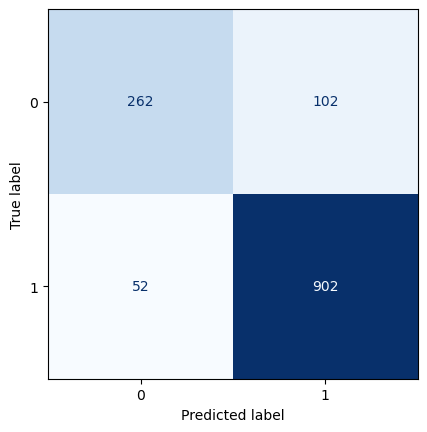

In [73]:
 cmd = ConfusionMatrixDisplay.from_predictions(test_y, final_predictions, cmap=plt.cm.Blues, colorbar=False) #confusion matrix

# 8. Boosting

In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier  #importing the modules

hgb_clf = HistGradientBoostingClassifier(max_leaf_nodes=16, max_iter=10, learning_rate=.1)
hgb_clf.fit(train_X, train_y)

print('Balanced accuracy',round(balanced_accuracy_score(test_y, hgb_clf.predict(test_X)),4))

Balanced accuracy 0.8055


In [75]:
from sklearn.model_selection import RandomizedSearchCV   #importing the modules
from scipy.stats import loguniform, randint

param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(50, 250),
              'learning_rate': loguniform(1e-2, 0.2)}

rand_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=0),
                                 param_grid, cv=10, n_iter = 50, scoring='balanced_accuracy',
                                 random_state=42)

rand_search.fit(train_X, train_y)      #fitting the model
rand_cv_res = pd.DataFrame(rand_search.cv_results_)
rand_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

param_learning_rate param_max_iter param_max_leaf_nodes  mean_test_score
16            0.112655             58                   11         0.835827
29             0.02286            206                   14         0.833700
33             0.08881             82                   12         0.833041
0             0.030711            142                   12         0.831508
21            0.072772             51                   15         0.831179

In [76]:
hgb_hp = rand_search.best_estimator_  # includes preprocessing

hgb_hp_p = hgb_hp.predict(test_X)

hgb_hp_a = accuracy_score(test_y, hgb_hp_p)
hgb_hp_ba = balanced_accuracy_score(test_y, hgb_hp_p)
hgb_hp_p = precision_score(test_y, hgb_hp_p)

In [77]:
hgb_hp_p = hgb_hp.predict(test_X)  #predicting the model
hgb_hp_r = recall_score(test_y, hgb_hp_p) #calculating the recall_score
hgb_hp_f1 = f1_score(test_y, hgb_hp_p) #calculating the f1 score

In [78]:
print('Accuracy',round(hgb_hp_a,4))        #printing the values
print('Balanced accuracy',round(hgb_hp_ba,4))
print('Recall',round(hgb_hp_r,4))
print('F1-Score',round(hgb_hp_f1,4))

Accuracy 0.8915
Balanced accuracy 0.846
Recall 0.9476
F1-Score 0.9267


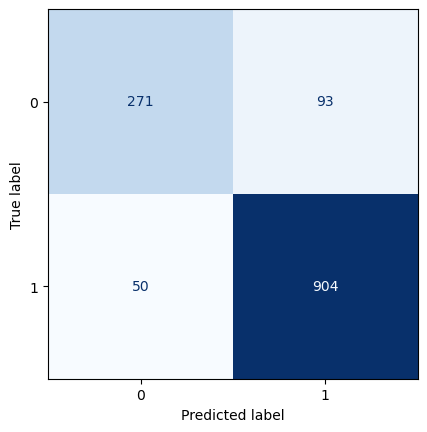

In [79]:
cmd1 = ConfusionMatrixDisplay.from_predictions(test_y, hgb_hp_p, cmap=plt.cm.Blues, colorbar=False) #Confusion Matrix